In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.8 MB/s eta 0:00:00


In [3]:
import torch
import pandas as pd
import plotly.graph_objs as go
from torch_geometric.data import Data

# Load the dataset
file_path = '/content/drive/MyDrive/Iqram Sir/Final_data_train.csv'
df = pd.read_csv(file_path)

# Define anatomical connections as edges
edges = torch.tensor([
    [0, 2],  # FOOT_RIGHT to ANKLE_RIGHT
    [1, 3],  # FOOT_LEFT to ANKLE_LEFT
    [2, 4],  # ANKLE_RIGHT to KNEE_RIGHT
    [3, 5],  # ANKLE_LEFT to KNEE_LEFT
    [4, 6],  # KNEE_RIGHT to HIP_RIGHT
    [5, 7],  # KNEE_LEFT to HIP_LEFT
    [6, 8],  # HIP_RIGHT to PELVIS
    [7, 8],  # HIP_LEFT to PELVIS
    [8, 9],  # PELVIS to SPINE_NAVAL
    [9, 10], # SPINE_NAVAL to SPINE_CHEST
    [10, 11],# SPINE_CHEST to CLAVICLE_RIGHT
    [10, 12],# SPINE_CHEST to CLAVICLE_LEFT
    [11, 13],# CLAVICLE_RIGHT to SHOULDER_RIGHT
    [12, 14],# CLAVICLE_LEFT to SHOULDER_LEFT
    [13, 15],# SHOULDER_RIGHT to ELBOW_RIGHT
    [14, 16],# SHOULDER_LEFT to ELBOW_LEFT
    [15, 17],# ELBOW_RIGHT to WRIST_RIGHT
    [16, 18],# ELBOW_LEFT to WRIST_LEFT
    [17, 19],# WRIST_RIGHT to HAND_RIGHT
    [18, 20],# WRIST_LEFT to HAND_LEFT
    [19, 21],# HAND_RIGHT to HANDTIP_RIGHT
    [20, 22],# HAND_LEFT to HANDTIP_LEFT
    [21, 23],# HANDTIP_RIGHT to THUMB_RIGHT
    [22, 24],# HANDTIP_LEFT to THUMB_LEFT
    [10, 25],# SPINE_CHEST to NECK
    [25, 26],# NECK to HEAD
]).t().contiguous()

# List of joints in the order they appear in the DataFrame
joints = [
    'FOOT_RIGHT', 'FOOT_LEFT', 'ANKLE_RIGHT', 'ANKLE_LEFT', 'KNEE_RIGHT', 'KNEE_LEFT',
    'HIP_RIGHT', 'HIP_LEFT', 'PELVIS', 'SPINE_NAVAL', 'SPINE_CHEST',
    'CLAVICLE_RIGHT', 'CLAVICLE_LEFT', 'SHOULDER_RIGHT', 'SHOULDER_LEFT',
    'ELBOW_RIGHT', 'ELBOW_LEFT', 'WRIST_RIGHT', 'WRIST_LEFT', 'HAND_RIGHT',
    'HAND_LEFT', 'HANDTIP_RIGHT', 'HANDTIP_LEFT', 'THUMB_RIGHT', 'THUMB_LEFT',
    'NECK', 'HEAD', 'NOSE', 'EYE_LEFT', 'EAR_LEFT', 'EYE_RIGHT', 'EAR_RIGHT'
]

# Function to extract node features and create a Data object
def create_data_object_vis(row):
    node_features = []
    node_positions = []  # Store (x, y, z) positions separately for Plotly visualization

    for joint in joints:
        x = row[f'{joint}_X']
        y = row[f'{joint}_Y']
        z = row[f'{joint}_Z']
        node_features.append([x, y, z])
        node_positions.append((x, y, z))  # Save position for each joint

    node_features = torch.tensor(node_features, dtype=torch.float)

    # Extract label (assuming 'frailty' is the target column)
    label = torch.tensor([row['frailty_class']], dtype=torch.float)

    # Create the Data object
    data = Data(x=node_features, edge_index=edges, y=label)

    return data, node_positions

# Function to plot the graph using Plotly
def plot_graph(node_positions):
    # Extract x, y, z coordinates from node_positions
    x_coords = [pos[0] for pos in node_positions]
    y_coords = [pos[1] for pos in node_positions]
    z_coords = [pos[2] for pos in node_positions]

    # Create edges for Plotly
    edge_x = []
    edge_y = []
    edge_z = []
    for edge in edges.t().tolist():
        x0, y0, z0 = node_positions[edge[0]]
        x1, y1, z1 = node_positions[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        edge_z.extend([z0, z1, None])

    # Plot the edges
    edge_trace = go.Scatter3d(
        x=edge_x, y=edge_y, z=edge_z,
        mode='lines',
        line=dict(color='black', width=2),
        hoverinfo='none'
    )

    # Plot the nodes with joint names
    node_trace = go.Scatter3d(
        x=x_coords, y=y_coords, z=z_coords,
        mode='markers+text',
        marker=dict(size=6, color='blue'),
        text=joints,  # Use the joint names as text labels
        hoverinfo='text'
    )

    # Create the figure with gridlines and joint names
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title='3D  Visualization',
                        showlegend=False,
                        scene=dict(
                            xaxis=dict(
                                showbackground=True,
                                backgroundcolor="rgb(230, 230, 230)",
                                gridcolor="rgb(200, 200, 200)",
                                showgrid=True,
                                zerolinecolor="rgb(200, 200, 200)",
                            ),
                            yaxis=dict(
                                showbackground=True,
                                backgroundcolor="rgb(230, 230, 230)",
                                gridcolor="rgb(200, 200, 200)",
                                showgrid=True,
                                zerolinecolor="rgb(200, 200, 200)",
                            ),
                            zaxis=dict(
                                showbackground=True,
                                backgroundcolor="rgb(230, 230, 230)",
                                gridcolor="rgb(200, 200, 200)",
                                showgrid=True,
                                zerolinecolor="rgb(200, 200, 200)",
                            ),
                        ),
                        margin=dict(l=0, r=0, b=0, t=40),
                    ))

    fig.show()

# Example usage with a single row (e.g., the first row in your DataFrame)
single_row = df.iloc[0]
data, node_positions = create_data_object_vis(single_row)

# Plot the graph using Plotly
plot_graph(node_positions)


In [6]:
import torch
import pandas as pd
import plotly.graph_objs as go
from torch_geometric.data import Data

# Load the dataset
file_path = '/content/drive/MyDrive/Iqram Sir/Final_data_train.csv'
df = pd.read_csv(file_path)

# Define anatomical connections as edges
edges = torch.tensor([
    [0, 2],  # FOOT_RIGHT to ANKLE_RIGHT
    [1, 3],  # FOOT_LEFT to ANKLE_LEFT
    [2, 4],  # ANKLE_RIGHT to KNEE_RIGHT
    [3, 5],  # ANKLE_LEFT to KNEE_LEFT
    [4, 6],  # KNEE_RIGHT to HIP_RIGHT
    [5, 7],  # KNEE_LEFT to HIP_LEFT
    [6, 8],  # HIP_RIGHT to PELVIS
    [7, 8],  # HIP_LEFT to PELVIS
    [8, 9],  # PELVIS to SPINE_NAVAL
    [9, 10], # SPINE_NAVAL to SPINE_CHEST
    [10, 11],# SPINE_CHEST to CLAVICLE_RIGHT
    [10, 12],# SPINE_CHEST to CLAVICLE_LEFT
    [11, 13],# CLAVICLE_RIGHT to SHOULDER_RIGHT
    [12, 14],# CLAVICLE_LEFT to SHOULDER_LEFT
    [13, 15],# SHOULDER_RIGHT to ELBOW_RIGHT
    [14, 16],# SHOULDER_LEFT to ELBOW_LEFT
    [15, 17],# ELBOW_RIGHT to WRIST_RIGHT
    [16, 18],# ELBOW_LEFT to WRIST_LEFT
    [17, 19],# WRIST_RIGHT to HAND_RIGHT
    [18, 20],# WRIST_LEFT to HAND_LEFT
    [19, 21],# HAND_RIGHT to HANDTIP_RIGHT
    [20, 22],# HAND_LEFT to HANDTIP_LEFT
    [21, 23],# HANDTIP_RIGHT to THUMB_RIGHT
    [22, 24],# HANDTIP_LEFT to THUMB_LEFT
    [10, 25],# SPINE_CHEST to NECK
    [25, 26],# NECK to HEAD
]).t().contiguous()

# List of joints in the order they appear in the DataFrame
joints = [
    'FOOT_RIGHT', 'FOOT_LEFT', 'ANKLE_RIGHT', 'ANKLE_LEFT', 'KNEE_RIGHT', 'KNEE_LEFT',
    'HIP_RIGHT', 'HIP_LEFT', 'PELVIS', 'SPINE_NAVAL', 'SPINE_CHEST',
    'CLAVICLE_RIGHT', 'CLAVICLE_LEFT', 'SHOULDER_RIGHT', 'SHOULDER_LEFT',
    'ELBOW_RIGHT', 'ELBOW_LEFT', 'WRIST_RIGHT', 'WRIST_LEFT', 'HAND_RIGHT',
    'HAND_LEFT', 'HANDTIP_RIGHT', 'HANDTIP_LEFT', 'THUMB_RIGHT', 'THUMB_LEFT',
    'NECK', 'HEAD', 'NOSE', 'EYE_LEFT', 'EAR_LEFT', 'EYE_RIGHT', 'EAR_RIGHT'
]

# Function to extract node features and create a Data object
def create_data_object_vis(row):
    node_features = []
    node_positions = []  # Store (x, y, z) positions separately for Plotly visualization

    for joint in joints:
        x = row[f'{joint}_X']
        y = row[f'{joint}_Y']
        z = row[f'{joint}_Z']
        node_features.append([x, y, z])
        node_positions.append((x, y, z))  # Save position for each joint

    node_features = torch.tensor(node_features, dtype=torch.float)

    # Extract label (assuming 'frailty' is the target column)
    label = torch.tensor([row['frailty_class']], dtype=torch.float)

    # Create the Data object
    data = Data(x=node_features, edge_index=edges, y=label)

    return data, node_positions

# Function to plot the graph using Plotly
def plot_graph(node_positions):
    # Extract x, y, z coordinates from node_positions
    x_coords = [pos[0] for pos in node_positions]
    y_coords = [pos[1] for pos in node_positions]
    z_coords = [pos[2] for pos in node_positions]

    # Create edges for Plotly
    edge_x = []
    edge_y = []
    edge_z = []
    for edge in edges.t().tolist():
        x0, y0, z0 = node_positions[edge[0]]
        x1, y1, z1 = node_positions[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        edge_z.extend([z0, z1, None])

    # Plot the edges
    edge_trace = go.Scatter3d(
        x=edge_x, y=edge_y, z=edge_z,
        mode='lines',
        line=dict(color='black', width=2),
        hoverinfo='none'
    )

    # Plot the nodes with joint names and coordinates
    node_trace = go.Scatter3d(
        x=x_coords, y=y_coords, z=z_coords,
        mode='markers+text',
        marker=dict(size=6, color='blue'),
        text=[f'{joint}<br>({x:.2f}, {y:.2f}, {z:.2f})' for joint, x, y, z in zip(joints, x_coords, y_coords, z_coords)],  # Joint names and coordinates
        hoverinfo='text'
    )

    # Create the figure with gridlines and joint names
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title='3D Joint Visualization',
                        showlegend=False,
                        scene=dict(
                            xaxis=dict(
                                showbackground=True,
                                backgroundcolor="rgb(230, 230, 230)",
                                gridcolor="rgb(200, 200, 200)",
                                showgrid=True,
                                zerolinecolor="rgb(200, 200, 200)",
                            ),
                            yaxis=dict(
                                showbackground=True,
                                backgroundcolor="rgb(230, 230, 230)",
                                gridcolor="rgb(200, 200, 200)",
                                showgrid=True,
                                zerolinecolor="rgb(200, 200, 200)",
                            ),
                            zaxis=dict(
                                showbackground=True,
                                backgroundcolor="rgb(230, 230, 230)",
                                gridcolor="rgb(200, 200, 200)",
                                showgrid=True,
                                zerolinecolor="rgb(200, 200, 200)",
                            ),
                        ),
                        margin=dict(l=0, r=0, b=0, t=40),
                    ))

    fig.show()

# Example usage with a single row (e.g., the first row in your DataFrame)
single_row = df.iloc[0]
data, node_positions = create_data_object_vis(single_row)

# Plot the graph using Plotly
plot_graph(node_positions)


In [4]:
import torch
import pandas as pd
import plotly.graph_objs as go
from torch_geometric.data import Data

# Define anatomical connections as edges
edges = torch.tensor([
    [0, 2],  # FOOT_RIGHT to ANKLE_RIGHT
    [1, 3],  # FOOT_LEFT to ANKLE_LEFT
    [2, 4],  # ANKLE_RIGHT to KNEE_RIGHT
    [3, 5],  # ANKLE_LEFT to KNEE_LEFT
    [4, 6],  # KNEE_RIGHT to HIP_RIGHT
    [5, 7],  # KNEE_LEFT to HIP_LEFT
    [6, 8],  # HIP_RIGHT to PELVIS
    [7, 8],  # HIP_LEFT to PELVIS
    [8, 9],  # PELVIS to SPINE_NAVAL
    [9, 10], # SPINE_NAVAL to SPINE_CHEST
    [10, 11],# SPINE_CHEST to CLAVICLE_RIGHT
    [10, 12],# SPINE_CHEST to CLAVICLE_LEFT
    [11, 13],# CLAVICLE_RIGHT to SHOULDER_RIGHT
    [12, 14],# CLAVICLE_LEFT to SHOULDER_LEFT
    [13, 15],# SHOULDER_RIGHT to ELBOW_RIGHT
    [14, 16],# SHOULDER_LEFT to ELBOW_LEFT
    [15, 17],# ELBOW_RIGHT to WRIST_RIGHT
    [16, 18],# ELBOW_LEFT to WRIST_LEFT
    [17, 19],# WRIST_RIGHT to HAND_RIGHT
    [18, 20],# WRIST_LEFT to HAND_LEFT
    [19, 21],# HAND_RIGHT to HANDTIP_RIGHT
    [20, 22],# HAND_LEFT to HANDTIP_LEFT
    [21, 23],# HANDTIP_RIGHT to THUMB_RIGHT
    [22, 24],# HANDTIP_LEFT to THUMB_LEFT
    [10, 25],# SPINE_CHEST to NECK
    [25, 26],# NECK to HEAD
]).t().contiguous()

# List of joints in the order they appear
joints = [
    'FOOT_RIGHT', 'FOOT_LEFT', 'ANKLE_RIGHT', 'ANKLE_LEFT', 'KNEE_RIGHT', 'KNEE_LEFT',
    'HIP_RIGHT', 'HIP_LEFT', 'PELVIS', 'SPINE_NAVAL', 'SPINE_CHEST',
    'CLAVICLE_RIGHT', 'CLAVICLE_LEFT', 'SHOULDER_RIGHT', 'SHOULDER_LEFT',
    'ELBOW_RIGHT', 'ELBOW_LEFT', 'WRIST_RIGHT', 'WRIST_LEFT', 'HAND_RIGHT',
    'HAND_LEFT', 'HANDTIP_RIGHT', 'HANDTIP_LEFT', 'THUMB_RIGHT', 'THUMB_LEFT',
    'NECK', 'HEAD'
]

# Create mock data for a humanoid figure
def create_mock_data():
    mock_data = {
        'FOOT_RIGHT_X': 0, 'FOOT_RIGHT_Y': 0, 'FOOT_RIGHT_Z': 0,
        'FOOT_LEFT_X': 1, 'FOOT_LEFT_Y': 0, 'FOOT_LEFT_Z': 0,
        'ANKLE_RIGHT_X': 0, 'ANKLE_RIGHT_Y': 1, 'ANKLE_RIGHT_Z': 0,
        'ANKLE_LEFT_X': 1, 'ANKLE_LEFT_Y': 1, 'ANKLE_LEFT_Z': 0,
        'KNEE_RIGHT_X': 0, 'KNEE_RIGHT_Y': 2, 'KNEE_RIGHT_Z': 0,
        'KNEE_LEFT_X': 1, 'KNEE_LEFT_Y': 2, 'KNEE_LEFT_Z': 0,
        'HIP_RIGHT_X': 0, 'HIP_RIGHT_Y': 3, 'HIP_RIGHT_Z': 0,
        'HIP_LEFT_X': 1, 'HIP_LEFT_Y': 3, 'HIP_LEFT_Z': 0,
        'PELVIS_X': 0.5, 'PELVIS_Y': 3.5, 'PELVIS_Z': 0,
        'SPINE_NAVAL_X': 0.5, 'SPINE_NAVAL_Y': 4, 'SPINE_NAVAL_Z': 0,
        'SPINE_CHEST_X': 0.5, 'SPINE_CHEST_Y': 5, 'SPINE_CHEST_Z': 0,
        'CLAVICLE_RIGHT_X': 0, 'CLAVICLE_RIGHT_Y': 5.5, 'CLAVICLE_RIGHT_Z': 0,
        'CLAVICLE_LEFT_X': 1, 'CLAVICLE_LEFT_Y': 5.5, 'CLAVICLE_LEFT_Z': 0,
        'SHOULDER_RIGHT_X': 0, 'SHOULDER_RIGHT_Y': 6, 'SHOULDER_RIGHT_Z': 0,
        'SHOULDER_LEFT_X': 1, 'SHOULDER_LEFT_Y': 6, 'SHOULDER_LEFT_Z': 0,
        'ELBOW_RIGHT_X': 0, 'ELBOW_RIGHT_Y': 7, 'ELBOW_RIGHT_Z': 0,
        'ELBOW_LEFT_X': 1, 'ELBOW_LEFT_Y': 7, 'ELBOW_LEFT_Z': 0,
        'WRIST_RIGHT_X': 0, 'WRIST_RIGHT_Y': 8, 'WRIST_RIGHT_Z': 0,
        'WRIST_LEFT_X': 1, 'WRIST_LEFT_Y': 8, 'WRIST_LEFT_Z': 0,
        'HAND_RIGHT_X': 0, 'HAND_RIGHT_Y': 9, 'HAND_RIGHT_Z': 0,
        'HAND_LEFT_X': 1, 'HAND_LEFT_Y': 9, 'HAND_LEFT_Z': 0,
        'HANDTIP_RIGHT_X': 0, 'HANDTIP_RIGHT_Y': 9.5, 'HANDTIP_RIGHT_Z': 0,
        'HANDTIP_LEFT_X': 1, 'HANDTIP_LEFT_Y': 9.5, 'HANDTIP_LEFT_Z': 0,
        'THUMB_RIGHT_X': -0.5, 'THUMB_RIGHT_Y': 9, 'THUMB_RIGHT_Z': 0,
        'THUMB_LEFT_X': 1.5, 'THUMB_LEFT_Y': 9, 'THUMB_LEFT_Z': 0,
        'NECK_X': 0.5, 'NECK_Y': 6.5, 'NECK_Z': 0,
        'HEAD_X': 0.5, 'HEAD_Y': 7, 'HEAD_Z': 0,
    }

    return pd.Series(mock_data)

# Function to extract node features and create a Data object
def create_data_object_vis(row):
    node_features = []
    node_positions = []  # Store (x, y, z) positions separately for Plotly visualization

    for joint in joints:
        x = row[f'{joint}_X']
        y = row[f'{joint}_Y']
        z = row[f'{joint}_Z']
        node_features.append([x, y, z])
        node_positions.append((x, y, z))  # Save position for each joint

    node_features = torch.tensor(node_features, dtype=torch.float)

    # No label in this mock data
    label = torch.tensor([0], dtype=torch.float)

    # Create the Data object
    data = Data(x=node_features, edge_index=edges, y=label)

    return data, node_positions

# Function to plot the graph using Plotly
def plot_graph_large(node_positions):
    # Extract x, y, z coordinates from node_positions
    x_coords = [pos[0] for pos in node_positions]
    y_coords = [pos[1] for pos in node_positions]
    z_coords = [pos[2] for pos in node_positions]

    # Create edges for Plotly
    edge_x = []
    edge_y = []
    edge_z = []
    for edge in edges.t().tolist():
        x0, y0, z0 = node_positions[edge[0]]
        x1, y1, z1 = node_positions[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        edge_z.extend([z0, z1, None])

    # Plot the edges
    edge_trace = go.Scatter3d(
        x=edge_x, y=edge_y, z=edge_z,
        mode='lines',
        line=dict(color='black', width=3),  # Increased width for better visibility
        hoverinfo='none'
    )

    # Plot the nodes with joint names
    node_trace = go.Scatter3d(
        x=x_coords, y=y_coords, z=z_coords,
        mode='markers+text',
        marker=dict(size=8, color='blue'),  # Increased size for better visibility
        text=joints,  # Use the joint names as text labels
        hoverinfo='text'
    )

    # Create the figure with increased size
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title='3D Humanoid Skeleton Visualization',
                        showlegend=False,
                        scene=dict(
                            xaxis=dict(
                                showbackground=True,
                                backgroundcolor="rgb(230, 230, 230)",
                                gridcolor="rgb(200, 200, 200)",
                                showgrid=True,
                                zerolinecolor="rgb(200, 200, 200)",
                            ),
                            yaxis=dict(
                                showbackground=True,
                                backgroundcolor="rgb(230, 230, 230)",
                                gridcolor="rgb(200, 200, 200)",
                                showgrid=True,
                                zerolinecolor="rgb(200, 200, 200)",
                            ),
                            zaxis=dict(
                                showbackground=True,
                                backgroundcolor="rgb(230, 230, 230)",
                                gridcolor="rgb(200, 200, 200)",
                                showgrid=True,
                                zerolinecolor="rgb(200, 200, 200)",
                            ),
                        ),
                        width=1200,  # Increased width
                        height=800,  # Increased height
                        margin=dict(l=0, r=0, b=0, t=40),
                    ))

    fig.show()

# Create mock data for a humanoid figure
mock_data = create_mock_data()

# Convert the mock data to a Data object and node positions
data, node_positions = create_data_object_vis(mock_data)

# Plot the larger graph using Plotly
plot_graph_large(node_positions)


In [5]:
import torch
import pandas as pd
import plotly.graph_objs as go
from torch_geometric.data import Data

# Load the dataset
file_path = '/content/drive/MyDrive/Iqram Sir/Final_data_train.csv'
df = pd.read_csv(file_path)

# Define anatomical connections as edges
edges = torch.tensor([
    [0, 2],  # FOOT_RIGHT to ANKLE_RIGHT
    [1, 3],  # FOOT_LEFT to ANKLE_LEFT
    [2, 4],  # ANKLE_RIGHT to KNEE_RIGHT
    [3, 5],  # ANKLE_LEFT to KNEE_LEFT
    [4, 6],  # KNEE_RIGHT to HIP_RIGHT
    [5, 7],  # KNEE_LEFT to HIP_LEFT
    [6, 8],  # HIP_RIGHT to PELVIS
    [7, 8],  # HIP_LEFT to PELVIS
    [8, 9],  # PELVIS to SPINE_NAVAL
    [9, 10], # SPINE_NAVAL to SPINE_CHEST
    [10, 11],# SPINE_CHEST to CLAVICLE_RIGHT
    [10, 12],# SPINE_CHEST to CLAVICLE_LEFT
    [11, 13],# CLAVICLE_RIGHT to SHOULDER_RIGHT
    [12, 14],# CLAVICLE_LEFT to SHOULDER_LEFT
    [13, 15],# SHOULDER_RIGHT to ELBOW_RIGHT
    [14, 16],# SHOULDER_LEFT to ELBOW_LEFT
    [15, 17],# ELBOW_RIGHT to WRIST_RIGHT
    [16, 18],# ELBOW_LEFT to WRIST_LEFT
    [17, 19],# WRIST_RIGHT to HAND_RIGHT
    [18, 20],# WRIST_LEFT to HAND_LEFT
    [19, 21],# HAND_RIGHT to HANDTIP_RIGHT
    [20, 22],# HAND_LEFT to HANDTIP_LEFT
    [21, 23],# HANDTIP_RIGHT to THUMB_RIGHT
    [22, 24],# HANDTIP_LEFT to THUMB_LEFT
    [10, 25],# SPINE_CHEST to NECK
    [25, 26],# NECK to HEAD
]).t().contiguous()

# List of joints in the order they appear in the DataFrame
joints = [
    'FOOT_RIGHT', 'FOOT_LEFT', 'ANKLE_RIGHT', 'ANKLE_LEFT', 'KNEE_RIGHT', 'KNEE_LEFT',
    'HIP_RIGHT', 'HIP_LEFT', 'PELVIS', 'SPINE_NAVAL', 'SPINE_CHEST',
    'CLAVICLE_RIGHT', 'CLAVICLE_LEFT', 'SHOULDER_RIGHT', 'SHOULDER_LEFT',
    'ELBOW_RIGHT', 'ELBOW_LEFT', 'WRIST_RIGHT', 'WRIST_LEFT', 'HAND_RIGHT',
    'HAND_LEFT', 'HANDTIP_RIGHT', 'HANDTIP_LEFT', 'THUMB_RIGHT', 'THUMB_LEFT',
    'NECK', 'HEAD', 'NOSE', 'EYE_LEFT', 'EAR_LEFT', 'EYE_RIGHT', 'EAR_RIGHT'
]

# Function to extract node features and create a Data object
def create_data_object_vis(row):
    node_features = []
    node_positions = []  # Store (x, y, z) positions separately for Plotly visualization

    for joint in joints:
        x = row[f'{joint}_X']
        y = row[f'{joint}_Y']
        z = row[f'{joint}_Z']
        node_features.append([x, y, z])
        node_positions.append((x, y, z))  # Save position for each joint

    node_features = torch.tensor(node_features, dtype=torch.float)

    # Extract label (assuming 'frailty' is the target column)
    label = torch.tensor([row['frailty_class']], dtype=torch.float)

    # Create the Data object
    data = Data(x=node_features, edge_index=edges, y=label)

    return data, node_positions

# Function to plot the animated graph using Plotly
def plot_graph_animation(df, start_row=0, end_row=10):
    frames = []

    for i in range(start_row, end_row + 1):
        single_row = df.iloc[i]
        _, node_positions = create_data_object_vis(single_row)

        x_coords = [pos[0] for pos in node_positions]
        y_coords = [pos[1] for pos in node_positions]
        z_coords = [pos[2] for pos in node_positions]

        # Create edges for Plotly
        edge_x = []
        edge_y = []
        edge_z = []
        for edge in edges.t().tolist():
            x0, y0, z0 = node_positions[edge[0]]
            x1, y1, z1 = node_positions[edge[1]]
            edge_x.extend([x0, x1, None])
            edge_y.extend([y0, y1, None])
            edge_z.extend([z0, z1, None])

        # Create the scatter and line traces
        edge_trace = go.Scatter3d(
            x=edge_x, y=edge_y, z=edge_z,
            mode='lines',
            line=dict(color='black', width=2),
            hoverinfo='none'
        )

        node_trace = go.Scatter3d(
            x=x_coords, y=y_coords, z=z_coords,
            mode='markers+text',
            marker=dict(size=6, color='blue'),
            text=joints,  # Use the joint names as text labels
            hoverinfo='text'
        )

        # Add the frame to the frames list
        frames.append(go.Frame(data=[edge_trace, node_trace], name=str(i)))

    # Create the figure with frames
    fig = go.Figure(
        data=[frames[0].data[0], frames[0].data[1]],
        layout=go.Layout(
            title='3D Joint Visualization Animation',
            showlegend=False,
            scene=dict(
                xaxis=dict(
                    showbackground=True,
                    backgroundcolor="rgb(230, 230, 230)",
                    gridcolor="rgb(200, 200, 200)",
                    showgrid=True,
                    zerolinecolor="rgb(200, 200, 200)",
                ),
                yaxis=dict(
                    showbackground=True,
                    backgroundcolor="rgb(230, 230, 230)",
                    gridcolor="rgb(200, 200, 200)",
                    showgrid=True,
                    zerolinecolor="rgb(200, 200, 200)",
                ),
                zaxis=dict(
                    showbackground=True,
                    backgroundcolor="rgb(230, 230, 230)",
                    gridcolor="rgb(200, 200, 200)",
                    showgrid=True,
                    zerolinecolor="rgb(200, 200, 200)",
                ),
            ),
            margin=dict(l=0, r=0, b=0, t=40),
            updatemenus=[dict(type="buttons", showactive=False,
                              buttons=[dict(label="Play",
                                            method="animate",
                                            args=[None, dict(frame=dict(duration=500, redraw=True),
                                                             fromcurrent=True)])])]),
        frames=frames
    )

    fig.show()

# Call the function to plot the animation
plot_graph_animation(df, start_row=0, end_row=100)


In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = 'new_dataset.csv'
df = pd.read_csv(file_path)

# Generate a random frailty score (either 0 or 1) for each unique patient_id
frailty_scores = df.groupby('patient_id').ngroup().transform(lambda x: np.random.randint(0, 2))

# Assign the frailty scores to a new 'frailty' column in the dataframe
df['frailty'] = frailty_scores




In [ ]:
df.head()

,patient_id,trial,walking_speed,t_uniform,ACC_1,ACC_2,ACC_3,ACC_4,ACC_5,ACC_6,...,HEAD_Z,NOSE_Z,EYE_LEFT_Z,EAR_LEFT_Z,EYE_RIGHT_Z,EAR_RIGHT_Z,left_foot_swing,pelvis_pos,right_foot_swing,frailty
0,001-LO,Trial1,Regular,0.014806,2.019993e-05,8.896714e-06,1.985365e-07,4.808899e-08,3.431065e-06,8.920357e-06,...,455.851148,-429.608188,968.354628,546.261617,-460.863141,981.439603,229.423731,0.000000,-126.667489,1
1,001-LO,Trial1,Regular,0.034787,4.216104e-06,9.454107e-06,5.867013e-07,1.196821e-06,8.141100e-06,1.967057e-06,...,447.281911,-409.451975,991.238931,537.868640,-437.048488,1044.996519,317.214018,15.991805,-183.335114,1
2,001-LO,Trial1,Regular,0.054767,7.426360e-07,9.197260e-07,6.352156e-07,1.150434e-06,6.814340e-07,5.553919e-07,...,449.741414,-408.880941,1023.415136,542.683131,-443.993156,1073.302525,333.898894,58.530474,-230.894481,0
3,001-LO,Trial1,Regular,0.074748,4.502040e-07,1.693938e-07,9.162256e-08,3.878765e-07,2.871766e-07,4.022295e-07,...,455.991663,-415.800078,1059.598333,546.968971,-453.972524,1098.709654,334.847164,94.281263,-241.080300,1
4,001-LO,Trial1,Regular,0.094728,2.205772e-07,1.604461e-07,4.103939e-07,2.476341e-07,6.483686e-08,1.801898e-07,...,465.517432,-429.191348,1099.243905,550.798012,-466.574126,1121.611912,322.197695,125.323131,-218.972258,0


In [ ]:
df.columns.to_list()

['patient_id',
 'trial',
 'walking_speed',
 't_uniform',
 'ACC_1',
 'ACC_2',
 'ACC_3',
 'ACC_4',
 'ACC_5',
 'ACC_6',
 'accel_energy_total',
 'footfall_event_times',
 'PELVIS_X',
 'SPINE_NAVAL_X',
 'SPINE_CHEST_X',
 'NECK_X',
 'CLAVICLE_LEFT_X',
 'SHOULDER_LEFT_X',
 'ELBOW_LEFT_X',
 'WRIST_LEFT_X',
 'HAND_LEFT_X',
 'HANDTIP_LEFT_X',
 'THUMB_LEFT_X',
 'CLAVICLE_RIGHT_X',
 'SHOULDER_RIGHT_X',
 'ELBOW_RIGHT_X',
 'WRIST_RIGHT_X',
 'HAND_RIGHT_X',
 'HANDTIP_RIGHT_X',
 'THUMB_RIGHT_X',
 'HIP_LEFT_X',
 'KNEE_LEFT_X',
 'ANKLE_LEFT_X',
 'FOOT_LEFT_X',
 'HIP_RIGHT_X',
 'KNEE_RIGHT_X',
 'ANKLE_RIGHT_X',
 'FOOT_RIGHT_X',
 'HEAD_X',
 'NOSE_X',
 'EYE_LEFT_X',
 'EAR_LEFT_X',
 'EYE_RIGHT_X',
 'EAR_RIGHT_X',
 'PELVIS_Y',
 'SPINE_NAVAL_Y',
 'SPINE_CHEST_Y',
 'NECK_Y',
 'CLAVICLE_LEFT_Y',
 'SHOULDER_LEFT_Y',
 'ELBOW_LEFT_Y',
 'WRIST_LEFT_Y',
 'HAND_LEFT_Y',
 'HANDTIP_LEFT_Y',
 'THUMB_LEFT_Y',
 'CLAVICLE_RIGHT_Y',
 'SHOULDER_RIGHT_Y',
 'ELBOW_RIGHT_Y',
 'WRIST_RIGHT_Y',
 'HAND_RIGHT_Y',
 'HANDTIP_RIGHT_Y',

In [ ]:
df["frailty"].value_counts()

,count
frailty,
0,190
1,160


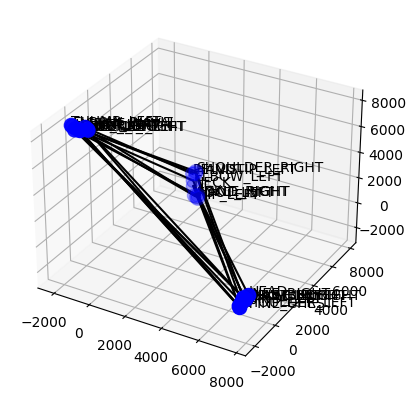

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

# Function to create a graph from a single row
def create_graph_from_row(row):
    G = nx.Graph()

    # Define the joints and their coordinates (X, Y, Z)
    # HEAD TO FOOT
    joints = {
        'FOOT_RIGHT': (row['FOOT_RIGHT_X'], row['FOOT_RIGHT_Y'], row['FOOT_RIGHT_Z']),
        'FOOT_LEFT': (row['FOOT_LEFT_X'], row['FOOT_LEFT_Y'], row['FOOT_LEFT_Z']),

        'ANKLE_RIGHT': (row['ANKLE_RIGHT_X'], row['ANKLE_RIGHT_Y'], row['ANKLE_RIGHT_Z']),
        'ANKLE_LEFT': (row['ANKLE_LEFT_X'], row['ANKLE_LEFT_Y'], row['ANKLE_LEFT_Z']),



        'KNEE_RIGHT': (row['KNEE_RIGHT_X'], row['KNEE_RIGHT_Y'], row['KNEE_RIGHT_Z']),
        'KNEE_LEFT': (row['KNEE_LEFT_X'], row['KNEE_LEFT_Y'], row['KNEE_LEFT_Z']),


        'HIP_RIGHT': (row['HIP_RIGHT_X'], row['HIP_RIGHT_Y'], row['HIP_RIGHT_Z']),
        'HIP_LEFT': (row['HIP_LEFT_X'], row['HIP_LEFT_Y'], row['HIP_LEFT_Z']),


        'PELVIS': (row['PELVIS_X'], row['PELVIS_Y'], row['PELVIS_Z']),



        'SPINE_CHEST': (row['SPINE_CHEST_X'], row['SPINE_CHEST_Y'], row['SPINE_CHEST_Z']),
        'SPINE_NAVAL': (row['SPINE_NAVAL_X'], row['SPINE_NAVAL_Y'], row['SPINE_NAVAL_Z']),



        'THUMB_RIGHT': (row['THUMB_RIGHT_X'], row['THUMB_RIGHT_Y'], row['THUMB_RIGHT_Z']),
        'THUMB_LEFT': (row['THUMB_LEFT_X'], row['THUMB_LEFT_Y'], row['THUMB_LEFT_Z']),


        'HANDTIP_RIGHT': (row['HANDTIP_RIGHT_X'], row['HANDTIP_RIGHT_Y'], row['HANDTIP_RIGHT_Z']),
        'HANDTIP_LEFT': (row['HANDTIP_LEFT_X'], row['HANDTIP_LEFT_Y'], row['HANDTIP_LEFT_Z']),

        'HAND_RIGHT': (row['HAND_RIGHT_X'], row['HAND_RIGHT_Y'], row['HAND_RIGHT_Z']),
        'HAND_LEFT': (row['HAND_LEFT_X'], row['HAND_LEFT_Y'], row['HAND_LEFT_Z']),

        'WRIST_RIGHT': (row['WRIST_RIGHT_X'], row['WRIST_RIGHT_Y'], row['WRIST_RIGHT_Z']),
        'WRIST_LEFT': (row['WRIST_LEFT_X'], row['WRIST_LEFT_Y'], row['WRIST_LEFT_Z']),



        'ELBOW_RIGHT': (row['ELBOW_RIGHT_X'], row['ELBOW_RIGHT_Y'], row['ELBOW_RIGHT_Z']),
        'ELBOW_LEFT': (row['ELBOW_LEFT_X'], row['ELBOW_LEFT_Y'], row['ELBOW_LEFT_Z']),


        'SHOULDER_RIGHT': (row['SHOULDER_RIGHT_X'], row['SHOULDER_RIGHT_Y'], row['SHOULDER_RIGHT_Z']),
        'SHOULDER_LEFT': (row['SHOULDER_LEFT_X'], row['SHOULDER_LEFT_Y'], row['SHOULDER_LEFT_Z']),


        'CLAVICLE_RIGHT': (row['CLAVICLE_RIGHT_X'], row['CLAVICLE_RIGHT_Y'], row['CLAVICLE_RIGHT_Z']),
        'CLAVICLE_LEFT': (row['CLAVICLE_LEFT_X'], row['CLAVICLE_LEFT_Y'], row['CLAVICLE_LEFT_Z']),

        'NECK': (row['NECK_X'], row['NECK_Y'], row['NECK_Z']),
        'HEAD': (row['HEAD_X'], row['HEAD_Y'], row['HEAD_Z']),


        #'NOSE': (row['NOSE_X'], row['NOSE_Y'], row['NOSE_Z']),
        #'EYE_LEFT': (row['EYE_LEFT_X'], row['EYE_LEFT_Y'], row['EYE_LEFT_Z']),
        #'EYE_RIGHT': (row['EYE_RIGHT_X'], row['EYE_RIGHT_Y'], row['EYE_RIGHT_Z']),
        #'EAR_LEFT': (row['EAR_LEFT_X'], row['EAR_LEFT_Y'], row['EAR_LEFT_Z']),
        #'EAR_RIGHT': (row['EAR_RIGHT_X'], row['EAR_RIGHT_Y'], row['EAR_RIGHT_Z']),
    }

    # Add nodes to the graph
    for joint, coords in joints.items():
        G.add_node(joint, pos=coords)

    # Define edges based on anatomical connections
    G.add_edges_from([
        ('FOOT_RIGHT', 'KNEE_RIGHT'),
        ('FOOT_LEFT', 'KNEE_LEFT'),
        ('ANKLE_RIGHT', 'HIP_RIGHT'),
        ('ANKLE_LEFT', 'HIP_LEFT'),
        ('PELVIS', 'SPINE_NAVAL'),
        ('SPINE_NAVAL', 'SPINE_CHEST'),
        ('SPINE_CHEST', 'NECK'),
        ('SPINE_CHEST', 'CLAVICLE_RIGHT'),
        ('SPINE_CHEST', 'CLAVICLE_LEFT'),
        ('CLAVICLE_RIGHT', 'SHOULDER_RIGHT'),
        ('CLAVICLE_LEFT', 'SHOULDER_LEFT'),
        ('SHOULDER_RIGHT', 'ELBOW_RIGHT'),
        ('SHOULDER_LEFT', 'ELBOW_LEFT'),
        ('ELBOW_RIGHT', 'WRIST_RIGHT'),
        ('ELBOW_LEFT', 'WRIST_LEFT'),
        ('WRIST_RIGHT', 'HAND_RIGHT'),
        ('WRIST_LEFT', 'HAND_LEFT'),
        ('HAND_RIGHT', 'HANDTIP_RIGHT'),
        ('HAND_LEFT', 'HANDTIP_LEFT'),
        ('HANDTIP_RIGHT', 'THUMB_RIGHT'),
        ('HANDTIP_LEFT', 'THUMB_LEFT'),
        ('NECK', 'HEAD'),
        #('HEAD', 'NOSE'),
        #('HEAD', 'EYE_LEFT'),
        #('HEAD', 'EYE_RIGHT'),
        #('EYE_LEFT', 'EAR_LEFT'),
        #('EYE_RIGHT', 'EAR_RIGHT'),

    ])

    return G



# Function to visualize the graph in 3D
def visualize_graph_3d(G):
    pos = nx.get_node_attributes(G, 'pos')
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extract positions for plotting
    xs = [pos[node][0] for node in G.nodes()]
    ys = [pos[node][1] for node in G.nodes()]
    zs = [pos[node][2] for node in G.nodes()]

    # Plot the nodes
    ax.scatter(xs, ys, zs, s=100, color='blue')

    # Plot the edges
    for edge in G.edges():
        x = [pos[edge[0]][0], pos[edge[1]][0]]
        y = [pos[edge[0]][1], pos[edge[1]][1]]
        z = [pos[edge[0]][2], pos[edge[1]][2]]
        ax.plot(x, y, z, color='black')

    # Annotate the nodes
    for node in G.nodes():
        ax.text(pos[node][0], pos[node][1], pos[node][2], s=node, size=10, zorder=1, color='k')

    plt.show()

# Visualize the first graph
G = create_graph_from_row(df.iloc[10])
visualize_graph_3d(G)


In [ ]:
import plotly.graph_objs as go
import networkx as nx

# Function to create a graph from a single row
def create_graph_from_row(row):
    G = nx.Graph()

    # Define the joints and their coordinates (X, Y, Z)
    joints = {
        'FOOT_RIGHT': (row['FOOT_RIGHT_X'], row['FOOT_RIGHT_Y'], row['FOOT_RIGHT_Z']),
        'FOOT_LEFT': (row['FOOT_LEFT_X'], row['FOOT_LEFT_Y'], row['FOOT_LEFT_Z']),
        'ANKLE_RIGHT': (row['ANKLE_RIGHT_X'], row['ANKLE_RIGHT_Y'], row['ANKLE_RIGHT_Z']),
        'ANKLE_LEFT': (row['ANKLE_LEFT_X'], row['ANKLE_LEFT_Y'], row['ANKLE_LEFT_Z']),
        'KNEE_RIGHT': (row['KNEE_RIGHT_X'], row['KNEE_RIGHT_Y'], row['KNEE_RIGHT_Z']),
        'KNEE_LEFT': (row['KNEE_LEFT_X'], row['KNEE_LEFT_Y'], row['KNEE_LEFT_Z']),
        'HIP_RIGHT': (row['HIP_RIGHT_X'], row['HIP_RIGHT_Y'], row['HIP_RIGHT_Z']),
        'HIP_LEFT': (row['HIP_LEFT_X'], row['HIP_LEFT_Y'], row['HIP_LEFT_Z']),
        'PELVIS': (row['PELVIS_X'], row['PELVIS_Y'], row['PELVIS_Z']),
        'SPINE_NAVAL': (row['SPINE_NAVAL_X'], row['SPINE_NAVAL_Y'], row['SPINE_NAVAL_Z']),
        'SPINE_CHEST': (row['SPINE_CHEST_X'], row['SPINE_CHEST_Y'], row['SPINE_CHEST_Z']),
        'CLAVICLE_RIGHT': (row['CLAVICLE_RIGHT_X'], row['CLAVICLE_RIGHT_Y'], row['CLAVICLE_RIGHT_Z']),
        'CLAVICLE_LEFT': (row['CLAVICLE_LEFT_X'], row['CLAVICLE_LEFT_Y'], row['CLAVICLE_LEFT_Z']),
        'SHOULDER_RIGHT': (row['SHOULDER_RIGHT_X'], row['SHOULDER_RIGHT_Y'], row['SHOULDER_RIGHT_Z']),
        'SHOULDER_LEFT': (row['SHOULDER_LEFT_X'], row['SHOULDER_LEFT_Y'], row['SHOULDER_LEFT_Z']),
        'ELBOW_RIGHT': (row['ELBOW_RIGHT_X'], row['ELBOW_RIGHT_Y'], row['ELBOW_RIGHT_Z']),
        'ELBOW_LEFT': (row['ELBOW_LEFT_X'], row['ELBOW_LEFT_Y'], row['ELBOW_LEFT_Z']),
        'WRIST_RIGHT': (row['WRIST_RIGHT_X'], row['WRIST_RIGHT_Y'], row['WRIST_RIGHT_Z']),
        'WRIST_LEFT': (row['WRIST_LEFT_X'], row['WRIST_LEFT_Y'], row['WRIST_LEFT_Z']),
        'HAND_RIGHT': (row['HAND_RIGHT_X'], row['HAND_RIGHT_Y'], row['HAND_RIGHT_Z']),
        'HAND_LEFT': (row['HAND_LEFT_X'], row['HAND_LEFT_Y'], row['HAND_LEFT_Z']),
        'HANDTIP_RIGHT': (row['HANDTIP_RIGHT_X'], row['HANDTIP_RIGHT_Y'], row['HANDTIP_RIGHT_Z']),
        'HANDTIP_LEFT': (row['HANDTIP_LEFT_X'], row['HANDTIP_LEFT_Y'], row['HANDTIP_LEFT_Z']),
        'THUMB_RIGHT': (row['THUMB_RIGHT_X'], row['THUMB_RIGHT_Y'], row['THUMB_RIGHT_Z']),
        'THUMB_LEFT': (row['THUMB_LEFT_X'], row['THUMB_LEFT_Y'], row['THUMB_LEFT_Z']),
        'NECK': (row['NECK_X'], row['NECK_Y'], row['NECK_Z']),
        'HEAD': (row['HEAD_X'], row['HEAD_Y'], row['HEAD_Z']),
    }

    # Add nodes to the graph
    for joint, coords in joints.items():
        G.add_node(joint, pos=coords)

    # Define edges based on anatomical connections
    G.add_edges_from([
        # Legs
        ('FOOT_RIGHT', 'ANKLE_RIGHT'),
        ('FOOT_LEFT', 'ANKLE_LEFT'),
        ('ANKLE_RIGHT', 'KNEE_RIGHT'),
        ('ANKLE_LEFT', 'KNEE_LEFT'),
        ('KNEE_RIGHT', 'HIP_RIGHT'),
        ('KNEE_LEFT', 'HIP_LEFT'),
        ('HIP_RIGHT', 'PELVIS'),
        ('HIP_LEFT', 'PELVIS'),

        # Spine and arms
        ('PELVIS', 'SPINE_NAVAL'),
        ('SPINE_NAVAL', 'SPINE_CHEST'),
        ('SPINE_CHEST', 'CLAVICLE_RIGHT'),
        ('SPINE_CHEST', 'CLAVICLE_LEFT'),
        ('CLAVICLE_RIGHT', 'SHOULDER_RIGHT'),
        ('CLAVICLE_LEFT', 'SHOULDER_LEFT'),
        ('SHOULDER_RIGHT', 'ELBOW_RIGHT'),
        ('SHOULDER_LEFT', 'ELBOW_LEFT'),
        ('ELBOW_RIGHT', 'WRIST_RIGHT'),
        ('ELBOW_LEFT', 'WRIST_LEFT'),
        ('WRIST_RIGHT', 'HAND_RIGHT'),
        ('WRIST_LEFT', 'HAND_LEFT'),
        ('HAND_RIGHT', 'HANDTIP_RIGHT'),
        ('HAND_LEFT', 'HANDTIP_LEFT'),
        ('HANDTIP_RIGHT', 'THUMB_RIGHT'),
        ('HANDTIP_LEFT', 'THUMB_LEFT'),

        # Head and neck
        ('SPINE_CHEST', 'NECK'),
        ('NECK', 'HEAD'),
    ])

    return G

# Function to visualize the graph in 3D with Plotly
def visualize_graph_3d_plotly(G):
    pos = nx.get_node_attributes(G, 'pos')

    # Create edges
    edge_x = []
    edge_y = []
    edge_z = []
    for edge in G.edges():
        x0, y0, z0 = pos[edge[0]]
        x1, y1, z1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        edge_z.extend([z0, z1, None])

    edge_trace = go.Scatter3d(
        x=edge_x, y=edge_y, z=edge_z,
        line=dict(width=2, color='black'),
        hoverinfo='none',
        mode='lines')

    # Create nodes
    node_x = []
    node_y = []
    node_z = []
    node_text = []
    for node in G.nodes():
        x, y, z = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_z.append(z)
        node_text.append(node)

    node_trace = go.Scatter3d(
        x=node_x, y=node_y, z=node_z,
        mode='markers+text',
        marker=dict(
            size=8,
            color='blue',
            line=dict(width=2)),
        text=node_text,
        hoverinfo='text')

    # Create the figure with gridlines
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title='3D Human Skeleton Visualization with Grid',
                        showlegend=False,
                        scene=dict(
                            xaxis=dict(
                                showbackground=True,
                                backgroundcolor="rgb(230, 230, 230)",
                                gridcolor="rgb(200, 200, 200)",
                                showgrid=True,
                                zerolinecolor="rgb(200, 200, 200)",
                            ),
                            yaxis=dict(
                                showbackground=True,
                                backgroundcolor="rgb(230, 230, 230)",
                                gridcolor="rgb(200, 200, 200)",
                                showgrid=True,
                                zerolinecolor="rgb(200, 200, 200)",
                            ),
                            zaxis=dict(
                                showbackground=True,
                                backgroundcolor="rgb(230, 230, 230)",
                                gridcolor="rgb(200, 200, 200)",
                                showgrid=True,
                                zerolinecolor="rgb(200, 200, 200)",
                            ),
                        ),
                        margin=dict(l=0, r=0, b=0, t=40),
                    ))

    fig.show()

# Example usage
# Replace df.iloc[10] with an actual DataFrame row containing the skeleton data
G = create_graph_from_row(df.iloc[10])
visualize_graph_3d_plotly(G)




---



---



In [ ]:
!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.3 MB/s eta 0:00:00


In [ ]:
"""import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv

# Example ST-GCN model definition
class STGCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(STGCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(out_channels, 1)  # Assuming binary classification

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.relu(x)
        x = self.conv2(x, edge_index)
        x = torch.mean(x, dim=0)  # Global mean pooling
        out = self.fc(x)
        return torch.sigmoid(out)

# Dummy example data for a single graph
nodes_features = torch.tensor([
    [0.1, 0.2],  # Example node feature for FOOT_RIGHT
    [0.3, 0.4],  # Example node feature for HEAD
    # Add more features as needed...
])
edges = torch.tensor([
    [0, 1],  # Edge from FOOT_RIGHT to HEAD
    # Add more edges as needed...
])

# Create a Data object
data = Data(x=nodes_features, edge_index=edges.t().contiguous())

# Example model, optimizer, and loss
model = STGCN(in_channels=2, hidden_channels=4, out_channels=2)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

# Example training loop
for epoch in range(100):
    optimizer.zero_grad()
    output = model(data.x, data.edge_index)
    label = torch.tensor([1.0])  # Example label
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch}, Loss: {loss.item()}')
"""

In [ ]:
"""import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv

# Example ST-GCN model definition
class STGCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(STGCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(out_channels, 1)  # Assuming binary classification

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.relu(x)
        x = self.conv2(x, edge_index)
        x = torch.mean(x, dim=0)  # Global mean pooling
        out = self.fc(x)
        return torch.sigmoid(out)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dummy example data for a single graph
nodes_features = torch.tensor([
    [0.1, 0.2],  # Example node feature for FOOT_RIGHT
    [0.3, 0.4],  # Example node feature for HEAD
    # Add more features as needed...
]).to(device)

edges = torch.tensor([
    [0, 1],  # Edge from FOOT_RIGHT to HEAD
    # Add more edges as needed...
]).to(device)

# Create a Data object
data = Data(x=nodes_features, edge_index=edges.t().contiguous()).to(device)

# Hyperparameters
in_channels = 2
hidden_channels = 4
out_channels = 2
learning_rate = 0.01
num_epochs = 10

# Example model, optimizer, and loss
model = STGCN(in_channels, hidden_channels, out_channels).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss()

# Example training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(data.x, data.edge_index)
    label = torch.tensor([1.0], device=device)  # Example label
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')
"""

In [ ]:
"""import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from tqdm import tqdm

# Example ST-GCN model definition
class STGCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(STGCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(out_channels, 1)  # Assuming binary classification

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.relu(x)
        x = self.conv2(x, edge_index)
        x = torch.mean(x, dim=0)  # Global mean pooling
        out = self.fc(x)
        return torch.sigmoid(out)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dummy example data for a single graph
nodes_features = torch.tensor([
    [0.1, 0.2],  # Example node feature for FOOT_RIGHT
    [0.3, 0.4],  # Example node feature for HEAD
    # Add more features as needed...
]).to(device)

edges = torch.tensor([
    [0, 1],  # Edge from FOOT_RIGHT to HEAD
    # Add more edges as needed...
]).to(device)

# Create a Data object
data = Data(x=nodes_features, edge_index=edges.t().contiguous()).to(device)

# Hyperparameters
in_channels = 2
hidden_channels = 4
out_channels = 2
learning_rate = 0.01
num_epochs = 100

# Example model, optimizer, and loss
model = STGCN(in_channels, hidden_channels, out_channels).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss()

# Example label for training and testing
label = torch.tensor([1.0], device=device)  # Example label

# Function to calculate accuracy
def calculate_accuracy(output, labels):
    preds = (output > 0.5).float()  # Convert probabilities to binary predictions
    correct = (preds == labels).sum().item()
    accuracy = correct / len(labels)
    return accuracy

# Example training loop with progress bar
for epoch in tqdm(range(num_epochs)):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    output = model(data.x, data.edge_index)

    # Calculate loss
    loss = criterion(output, label)

    # Backward pass
    loss.backward()
    optimizer.step()

    # Calculate training accuracy
    train_accuracy = calculate_accuracy(output, label)

    # Example test data (same as training data in this dummy example)
    model.eval()
    with torch.no_grad():
        test_output = model(data.x, data.edge_index)
        test_loss = criterion(test_output, label)
        test_accuracy = calculate_accuracy(test_output, label)

    # Print metrics
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print(f'Training Loss: {loss.item():.4f}, Training Accuracy: {train_accuracy:.4f}')
    print(f'Testing Loss: {test_loss.item():.4f}, Testing Accuracy: {test_accuracy:.4f}')
    print("_-----------_---------_----------_---------_----------_--------_---------")
"""

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import pandas as pd
import numpy as np
from tqdm import tqdm
import pandas as pd
import numpy as np

# Load the CSV file
file_path = '/content/drive/MyDrive/Iqram Sir/Final_data_train.csv'
df = pd.read_csv(file_path)

"""# Generate a random frailty score (either 0 or 1) for each unique patient_id
frailty_scores = df.groupby('patient_id').ngroup().transform(lambda x: np.random.randint(0, 2))

# Assign the frailty scores to a new 'frailty' column in the dataframe
df['frailty'] = frailty_scores
"""


"# Generate a random frailty score (either 0 or 1) for each unique patient_id\nfrailty_scores = df.groupby('patient_id').ngroup().transform(lambda x: np.random.randint(0, 2))\n\n# Assign the frailty scores to a new 'frailty' column in the dataframe\ndf['frailty'] = frailty_scores\n"

In [ ]:
df

,patient_id,trial,walking_speed,t_uniform,ACC_1,ACC_2,ACC_3,ACC_4,ACC_5,ACC_6,...,HEAD_Z,NOSE_Z,EYE_LEFT_Z,EAR_LEFT_Z,EYE_RIGHT_Z,EAR_RIGHT_Z,left_foot_swing,pelvis_pos,right_foot_swing,frailty_class
0,001-LO,Trial1,Regular,0.014806,2.019993e-05,8.896714e-06,1.985365e-07,4.808899e-08,3.431065e-06,8.920357e-06,...,455.851148,-429.608188,968.354628,546.261617,-460.863141,981.439603,229.423731,0.000000,-126.667489,1
1,001-LO,Trial1,Regular,0.034787,4.216104e-06,9.454107e-06,5.867013e-07,1.196821e-06,8.141100e-06,1.967057e-06,...,447.281911,-409.451975,991.238931,537.868640,-437.048488,1044.996519,317.214018,15.991805,-183.335114,1
2,001-LO,Trial1,Regular,0.054767,7.426360e-07,9.197260e-07,6.352156e-07,1.150434e-06,6.814340e-07,5.553919e-07,...,449.741414,-408.880941,1023.415136,542.683131,-443.993156,1073.302525,333.898894,58.530474,-230.894481,1
3,001-LO,Trial1,Regular,0.074748,4.502040e-07,1.693938e-07,9.162256e-08,3.878765e-07,2.871766e-07,4.022295e-07,...,455.991663,-415.800078,1059.598333,546.968971,-453.972524,1098.709654,334.847164,94.281263,-241.080300,1
4,001-LO,Trial1,Regular,0.094728,2.205772e-07,1.604461e-07,4.103939e-07,2.476341e-07,6.483686e-08,1.801898e-07,...,465.517432,-429.191348,1099.243905,550.798012,-466.574126,1121.611912,322.197695,125.323131,-218.972258,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29690,033-JF,Trial6,Fast,3.674470,3.621851e-08,2.459920e-08,3.647725e-08,4.760885e-08,5.810166e-08,1.669351e-08,...,15.750463,-1830.034072,6117.095157,50.498839,-1821.418588,6074.163183,29.738870,5881.219741,52.022752,0
29691,033-JF,Trial6,Fast,3.694451,1.969678e-07,4.102441e-08,6.033898e-08,5.198374e-08,8.124909e-08,1.327768e-07,...,5.624461,-1800.946274,6246.428232,62.561174,-1842.360424,6153.901499,76.177623,5916.975985,107.525830,0
29692,033-JF,Trial6,Fast,3.714431,7.460775e-08,5.251341e-08,8.243533e-08,1.022884e-07,4.460898e-08,4.395956e-08,...,0.014015,-1808.882973,6303.637752,65.991323,-1865.468874,6214.573501,60.873630,5933.834089,78.630729,0
29693,033-JF,Trial6,Fast,3.734411,5.091162e-08,1.518550e-07,5.541707e-08,5.986175e-08,6.414930e-08,3.308678e-08,...,-7.367028,-1816.449895,6351.358966,63.480796,-1888.100452,6273.438357,44.800383,5960.967634,48.970032,0


In [ ]:
# Define anatomical connections as edges
edges = torch.tensor([
    [0, 2],  # FOOT_RIGHT to ANKLE_RIGHT
    [1, 3],  # FOOT_LEFT to ANKLE_LEFT
    [2, 4],  # ANKLE_RIGHT to KNEE_RIGHT
    [3, 5],  # ANKLE_LEFT to KNEE_LEFT
    [4, 6],  # KNEE_RIGHT to HIP_RIGHT
    [5, 7],  # KNEE_LEFT to HIP_LEFT
    [6, 8],  # HIP_RIGHT to PELVIS
    [7, 8],  # HIP_LEFT to PELVIS
    [8, 9],  # PELVIS to SPINE_NAVAL
    [9, 10], # SPINE_NAVAL to SPINE_CHEST
    [10, 11],# SPINE_CHEST to CLAVICLE_RIGHT
    [10, 12],# SPINE_CHEST to CLAVICLE_LEFT
    [11, 13],# CLAVICLE_RIGHT to SHOULDER_RIGHT
    [12, 14],# CLAVICLE_LEFT to SHOULDER_LEFT
    [13, 15],# SHOULDER_RIGHT to ELBOW_RIGHT
    [14, 16],# SHOULDER_LEFT to ELBOW_LEFT
    [15, 17],# ELBOW_RIGHT to WRIST_RIGHT
    [16, 18],# ELBOW_LEFT to WRIST_LEFT
    [17, 19],# WRIST_RIGHT to HAND_RIGHT
    [18, 20],# WRIST_LEFT to HAND_LEFT
    [19, 21],# HAND_RIGHT to HANDTIP_RIGHT
    [20, 22],# HAND_LEFT to HANDTIP_LEFT
    [21, 23],# HANDTIP_RIGHT to THUMB_RIGHT
    [22, 24],# HANDTIP_LEFT to THUMB_LEFT
    [10, 25],# SPINE_CHEST to NECK
    [25, 26],# NECK to HEAD
]).t().contiguous()


In [ ]:
# Function to extract node features and create a Data object
def create_data_object(row):
    node_features = []

    for joint in ['FOOT_RIGHT', 'FOOT_LEFT', 'ANKLE_RIGHT', 'ANKLE_LEFT', 'KNEE_RIGHT', 'KNEE_LEFT',
                  'HIP_RIGHT', 'HIP_LEFT', 'PELVIS', 'SPINE_NAVAL', 'SPINE_CHEST',
                  'CLAVICLE_RIGHT', 'CLAVICLE_LEFT', 'SHOULDER_RIGHT', 'SHOULDER_LEFT',
                  'ELBOW_RIGHT', 'ELBOW_LEFT', 'WRIST_RIGHT', 'WRIST_LEFT', 'HAND_RIGHT',
                  'HAND_LEFT', 'HANDTIP_RIGHT', 'HANDTIP_LEFT', 'THUMB_RIGHT', 'THUMB_LEFT',
                  'NECK', 'HEAD', 'NOSE', 'EYE_LEFT', 'EAR_LEFT', 'EYE_RIGHT', 'EAR_RIGHT']:

        x = row[f'{joint}_X']
        y = row[f'{joint}_Y']
        z = row[f'{joint}_Z']
        node_features.append([x, y, z])

    node_features = torch.tensor(node_features, dtype=torch.float)

    # Extract label (assuming 'frailty' is the target column)
    label = torch.tensor([row['frailty_class']], dtype=torch.float)

    # Create the Data object
    data = Data(x=node_features, edge_index=edges, y=label)

    return data


In [ ]:
# Apply the function to each row in the dataframe
data_list = [create_data_object(row) for index, row in df.iterrows()]

# Now data_list contains the graph data for each row in the dataset


In [ ]:
# Example ST-GCN model definition
class STGCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(STGCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(out_channels, 1)  # Assuming binary classification

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.relu(x)
        x = self.conv2(x, edge_index)
        x = torch.mean(x, dim=0)  # Global mean pooling
        out = self.fc(x)
        return torch.sigmoid(out)


In [ ]:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
in_channels = 3  # Number of features per node (e.g., x, y, z)
hidden_channels = 8
out_channels = 4
learning_rate = 0.01
num_epochs = 5

# Example model, optimizer, and loss
model = STGCN(in_channels, hidden_channels, out_channels).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss()

# Function to calculate accuracy
def calculate_accuracy(output, labels):
    preds = (output > 0.5).float()  # Convert probabilities to binary predictions
    correct = (preds == labels).sum().item()
    accuracy = correct / len(labels)
    return accuracy

# Example training loop with progress bar
for epoch in tqdm(range(num_epochs)):
    model.train()
    optimizer.zero_grad()

    # Training loop
    losses = []
    accuracies = []
    for data in data_list:
        data = data.to(device)
        output = model(data.x, data.edge_index)
        loss = criterion(output, data.y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        accuracies.append(calculate_accuracy(output, data.y))

    # Print metrics
    avg_loss = np.mean(losses)
    avg_accuracy = np.mean(accuracies)
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print(f'Training Loss: {avg_loss:.4f}, Training Accuracy: {avg_accuracy:.4f}')
    print("_-----------_---------_----------_---------_----------_--------_---------")


 20%|██        | 1/5 [01:32<06:09, 92.50s/it]

Epoch 1/5
Training Loss: 55.5279, Training Accuracy: 0.4447
_-----------_---------_----------_---------_----------_--------_---------


 40%|████      | 2/5 [03:07<04:41, 93.70s/it]

Epoch 2/5
Training Loss: 55.5279, Training Accuracy: 0.4447
_-----------_---------_----------_---------_----------_--------_---------


 60%|██████    | 3/5 [04:45<03:12, 96.06s/it]

Epoch 3/5
Training Loss: 55.5279, Training Accuracy: 0.4447
_-----------_---------_----------_---------_----------_--------_---------


 80%|████████  | 4/5 [06:22<01:36, 96.44s/it]

Epoch 4/5
Training Loss: 55.5279, Training Accuracy: 0.4447
_-----------_---------_----------_---------_----------_--------_---------


100%|██████████| 5/5 [07:59<00:00, 95.98s/it]

Epoch 5/5
Training Loss: 55.5279, Training Accuracy: 0.4447
_-----------_---------_----------_---------_----------_--------_---------


# Ealuate

In [ ]:
# Step 1: Load the testing dataset
test_file_path = '/content/drive/MyDrive/Iqram Sir/Final_data_valid.csv'  # Replace with your actual path
df_test = pd.read_csv(test_file_path)

# Step 2: Preprocess the testing data (same as training preprocessing)
# Note: Unpack the returned tuple to get the Data object
test_data_list = [create_data_object(row)[0] for index, row in df_test.iterrows()]  # Only keep the Data object

# Step 3: Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Switch the model to evaluation mode
model.eval()

# Lists to store all predictions and true labels
all_preds = []
all_labels = []

# Evaluate on the test data
with torch.no_grad():
    for data in test_data_list:
        data = data.to(device)  # Move Data object to the device
        output = model(data.x, data.edge_index)
        pred = (output > 0.5).float()  # Convert probabilities to binary predictions

        all_preds.append(pred.item())
        all_labels.append(data.y.item())

# Convert lists to tensors for evaluation
all_preds = torch.tensor(all_preds)
all_labels = torch.tensor(all_labels)

# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
conf_matrix = confusion_matrix(all_labels, all_preds)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.4792
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
[[7076    0]
 [7690    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



# Plot

In [ ]:
import torch
import pandas as pd
import plotly.graph_objs as go
from torch_geometric.data import Data

# Load the dataset
file_path = '/content/drive/MyDrive/Iqram Sir/Final_data_train.csv'
df = pd.read_csv(file_path)

# Define anatomical connections as edges
edges = torch.tensor([
    [0, 2],  # FOOT_RIGHT to ANKLE_RIGHT
    [1, 3],  # FOOT_LEFT to ANKLE_LEFT
    [2, 4],  # ANKLE_RIGHT to KNEE_RIGHT
    [3, 5],  # ANKLE_LEFT to KNEE_LEFT
    [4, 6],  # KNEE_RIGHT to HIP_RIGHT
    [5, 7],  # KNEE_LEFT to HIP_LEFT
    [6, 8],  # HIP_RIGHT to PELVIS
    [7, 8],  # HIP_LEFT to PELVIS
    [8, 9],  # PELVIS to SPINE_NAVAL
    [9, 10], # SPINE_NAVAL to SPINE_CHEST
    [10, 11],# SPINE_CHEST to CLAVICLE_RIGHT
    [10, 12],# SPINE_CHEST to CLAVICLE_LEFT
    [11, 13],# CLAVICLE_RIGHT to SHOULDER_RIGHT
    [12, 14],# CLAVICLE_LEFT to SHOULDER_LEFT
    [13, 15],# SHOULDER_RIGHT to ELBOW_RIGHT
    [14, 16],# SHOULDER_LEFT to ELBOW_LEFT
    [15, 17],# ELBOW_RIGHT to WRIST_RIGHT
    [16, 18],# ELBOW_LEFT to WRIST_LEFT
    [17, 19],# WRIST_RIGHT to HAND_RIGHT
    [18, 20],# WRIST_LEFT to HAND_LEFT
    [19, 21],# HAND_RIGHT to HANDTIP_RIGHT
    [20, 22],# HAND_LEFT to HANDTIP_LEFT
    [21, 23],# HANDTIP_RIGHT to THUMB_RIGHT
    [22, 24],# HANDTIP_LEFT to THUMB_LEFT
    [10, 25],# SPINE_CHEST to NECK
    [25, 26],# NECK to HEAD
]).t().contiguous()

# List of joints in the order they appear in the DataFrame
joints = [
    'FOOT_RIGHT', 'FOOT_LEFT', 'ANKLE_RIGHT', 'ANKLE_LEFT', 'KNEE_RIGHT', 'KNEE_LEFT',
    'HIP_RIGHT', 'HIP_LEFT', 'PELVIS', 'SPINE_NAVAL', 'SPINE_CHEST',
    'CLAVICLE_RIGHT', 'CLAVICLE_LEFT', 'SHOULDER_RIGHT', 'SHOULDER_LEFT',
    'ELBOW_RIGHT', 'ELBOW_LEFT', 'WRIST_RIGHT', 'WRIST_LEFT', 'HAND_RIGHT',
    'HAND_LEFT', 'HANDTIP_RIGHT', 'HANDTIP_LEFT', 'THUMB_RIGHT', 'THUMB_LEFT',
    'NECK', 'HEAD', 'NOSE', 'EYE_LEFT', 'EAR_LEFT', 'EYE_RIGHT', 'EAR_RIGHT'
]

# Function to extract node features and create a Data object
def create_data_object_vis(row):
    node_features = []
    node_positions = []  # Store (x, y, z) positions separately for Plotly visualization

    for joint in joints:
        x = row[f'{joint}_X']
        y = row[f'{joint}_Y']
        z = row[f'{joint}_Z']
        node_features.append([x, y, z])
        node_positions.append((x, y, z))  # Save position for each joint

    node_features = torch.tensor(node_features, dtype=torch.float)

    # Extract label (assuming 'frailty' is the target column)
    label = torch.tensor([row['frailty_class']], dtype=torch.float)

    # Create the Data object
    data = Data(x=node_features, edge_index=edges, y=label)

    return data, node_positions

# Function to plot the graph using Plotly
def plot_graph(node_positions):
    # Extract x, y, z coordinates from node_positions
    x_coords = [pos[0] for pos in node_positions]
    y_coords = [pos[1] for pos in node_positions]
    z_coords = [pos[2] for pos in node_positions]

    # Create edges for Plotly
    edge_x = []
    edge_y = []
    edge_z = []
    for edge in edges.t().tolist():
        x0, y0, z0 = node_positions[edge[0]]
        x1, y1, z1 = node_positions[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        edge_z.extend([z0, z1, None])

    # Plot the edges
    edge_trace = go.Scatter3d(
        x=edge_x, y=edge_y, z=edge_z,
        mode='lines',
        line=dict(color='black', width=2),
        hoverinfo='none'
    )

    # Plot the nodes with joint names
    node_trace = go.Scatter3d(
        x=x_coords, y=y_coords, z=z_coords,
        mode='markers+text',
        marker=dict(size=6, color='blue'),
        text=joints,  # Use the joint names as text labels
        hoverinfo='text'
    )

    # Create the figure with gridlines and joint names
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title='3D  Visualization',
                        showlegend=False,
                        scene=dict(
                            xaxis=dict(
                                showbackground=True,
                                backgroundcolor="rgb(230, 230, 230)",
                                gridcolor="rgb(200, 200, 200)",
                                showgrid=True,
                                zerolinecolor="rgb(200, 200, 200)",
                            ),
                            yaxis=dict(
                                showbackground=True,
                                backgroundcolor="rgb(230, 230, 230)",
                                gridcolor="rgb(200, 200, 200)",
                                showgrid=True,
                                zerolinecolor="rgb(200, 200, 200)",
                            ),
                            zaxis=dict(
                                showbackground=True,
                                backgroundcolor="rgb(230, 230, 230)",
                                gridcolor="rgb(200, 200, 200)",
                                showgrid=True,
                                zerolinecolor="rgb(200, 200, 200)",
                            ),
                        ),
                        margin=dict(l=0, r=0, b=0, t=40),
                    ))

    fig.show()

# Example usage with a single row (e.g., the first row in your DataFrame)
single_row = df.iloc[0]
data, node_positions = create_data_object_vis(single_row)

# Plot the graph using Plotly
plot_graph(node_positions)
